In [1]:
# load libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# load the data
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
# look at the data types of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# get the shape of the arrays
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [5]:
# take a look at the first image as an array
index = 2
x_train[index]

array([[[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[113, 120, 112],
        [111, 118, 111],
        [105, 112, 106],
        ...,
        [ 72,  81,  80],
        [ 72,  80,  79],
        [ 72,  80,  79]],

       [[111, 118, 110],
        [104, 111, 104],
        [ 99, 106,  98],
        ...,
        [ 68,  75,  73],
        [ 70,  76,  75],
        [ 78,  84,  82]],

       [[106, 113, 105],
        [ 99, 106,  98],
        [ 95, 102,  94],
        ...,
        [ 78,  85,  83],
        [ 79,  85,  83],
        [ 80,  86,  84]]

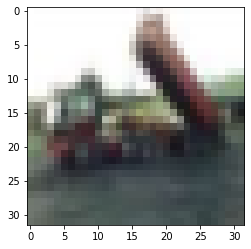

In [6]:
# show image as a picture
img = plt.imshow(x_train[index])

In [7]:
# get image label
print('The image label is: ', y_train[index])

The image label is:  [9]


In [8]:
# get image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# print image class
print('The image class is: ',classification[y_train[index][0]])

The image class is:  truck


In [9]:
 # convert the labels into a set of 10 numbers to input into the neural network
 y_train_one_hot = to_categorical(y_train)
 y_test_one_hot = to_categorical(y_test)

In [10]:
# print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
# print the new label of the image above
print('The one hot label is', y_train_one_hot[index])

The one hot label is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
# normalize the pixels to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255

In [13]:
 x_train[index]

array([[[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.44313725, 0.47058824, 0.43921569],
        [0.43529412, 0.4627451 , 0.43529412],
        [0.41176471, 0

In [14]:
# create the models architecture 
model = Sequential()

# add the first layer
#convolution layer : extract features from input image
model.add(Conv2D(32, (5,5), activation ='relu', input_shape = (32,32,3)) )

# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add a second convolution layer
model.add(Conv2D(32, (5,5), activation ='relu') )

# add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# add a flattening layer to reduce the dimensionality to a linear array
model.add(Flatten())

# add a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

# add dropout layer
model.add(Dropout(0.5))

# add a layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

# add dropout layer
model.add(Dropout(0.5))

# add a layer with 250 neurons
model.add(Dense(  250, activation = 'relu'))

# add a layer with 10 neurons
model.add(Dense(  10, activation = 'softmax'))

In [15]:
# compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [16]:
# train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 65s 2ms/step - loss: 1.8081 - accuracy: 0.3211 - val_loss: 1.6285 - val_accuracy: 0.4158
Epoch 2/10
40000/40000 [==============================] - 64s 2ms/step - loss: 1.4375 - accuracy: 0.4772 - val_loss: 1.3279 - val_accuracy: 0.5173
Epoch 3/10
40000/40000 [==============================] - 64s 2ms/step - loss: 1.2829 - accuracy: 0.5352 - val_loss: 1.2280 - val_accuracy: 0.5592
Epoch 4/10
40000/40000 [==============================] - 63s 2ms/step - loss: 1.1703 - accuracy: 0.5826 - val_loss: 1.1285 - val_accuracy: 0.5940
Epoch 5/10
40000/40000 [==============================] - 64s 2ms/step - loss: 1.0942 - accuracy: 0.6102 - val_loss: 1.0668 - val_accuracy: 0.6290
Epoch 6/10
40000/40000 [==============================] - 64s 2ms/step - loss: 1.0090 - accuracy: 0.6424 - val_loss: 1.0467 - val_accuracy: 0.6366
Epoch 7/10
40000/40000 [==============================] - 64s 2ms/st

In [17]:
# evaluate the model using the test dataset
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 546us/step


0.6625000238418579

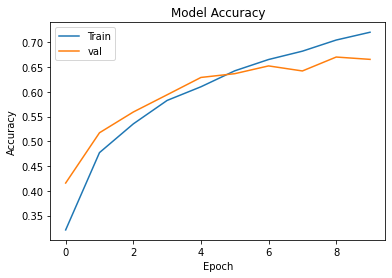

In [18]:
# vizualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc = 'upper left')
plt.show()

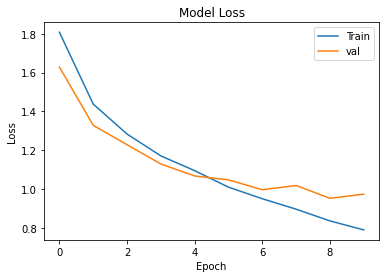

In [19]:
# vizualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val'], loc = 'upper right')
plt.show()

In [27]:
# test model with an example
from google.colab import files
uploaded = files.upload() 

Saving plane.jpg to plane.jpg


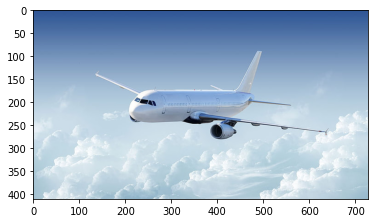

In [28]:
# show the image
new_image = plt.imread('plane.jpg')
img = plt.imshow(new_image)

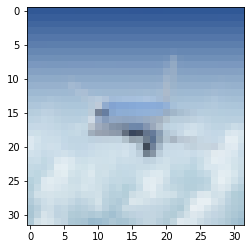

In [29]:
# resize the image 
from skimage.transform import resize
resized_img = resize(new_image,(32,32,3))
img = plt.imshow(resized_img)

In [30]:
# get the models predictions
predictions = model.predict(np.array([resized_img]))

#show the predictions
predictions

array([[0.6558749 , 0.00148513, 0.236911  , 0.01231443, 0.05385237,
        0.00501958, 0.00621297, 0.00129932, 0.02537932, 0.00165106]],
      dtype=float32)

In [31]:
# sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# show the sorted labels in order
print(list_index)

[0, 2, 4, 8, 3, 6, 5, 9, 1, 7]


In [32]:
# print the 5 first predictions 
for i in range(5):
  print(classification[list_index[i]],':', round(predictions[0][list_index[i]]* 100,2), '%')

airplane : 65.59 %
bird : 23.69 %
deer : 5.39 %
ship : 2.54 %
cat : 1.23 %
